Veri seti hikayesi ve yapisinin incelenmesi

In [1]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

Veri setinini hikayesi nedir?

In [2]:
df = planets.copy()
df.head()
df.tail()

       method  number  orbital_period  mass  distance  year
1030  Transit       1        3.941507   NaN     172.0  2006
1031  Transit       1        2.615864   NaN     148.0  2007
1032  Transit       1        3.191524   NaN     174.0  2007
1033  Transit       1        4.125083   NaN     293.0  2008
1034  Transit       1        4.187757   NaN     260.0  2008

Veri seti yapisal bilgileri

In [3]:
df.info()
df.dtypes

import pandas as pd
df.method = pd.Categorical(df.method)
df.dtypes
df.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


<bound method NDFrame.head of                method  number  ...  distance  year
0     Radial Velocity       1  ...     77.40  2006
1     Radial Velocity       1  ...     56.95  2008
2     Radial Velocity       1  ...     19.84  2011
3     Radial Velocity       1  ...    110.62  2007
4     Radial Velocity       1  ...    119.47  2009
...               ...     ...  ...       ...   ...
1030          Transit       1  ...    172.00  2006
1031          Transit       1  ...    148.00  2007
1032          Transit       1  ...    174.00  2007
1033          Transit       1  ...    293.00  2008
1034          Transit       1  ...    260.00  2008

[1035 rows x 6 columns]>

 # Veri setinin betimlenmesi

In [4]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head
df.shape
df.columns
df.describe(include="all").T

                 count unique  ...      75%       max
method            1035     10  ...      NaN       NaN
number          1035.0    NaN  ...      2.0       7.0
orbital_period   992.0    NaN  ...  526.005  730000.0
mass             513.0    NaN  ...     3.04      25.0
distance         808.0    NaN  ...    178.5    8500.0
year            1035.0    NaN  ...   2012.0    2014.0

[6 rows x 11 columns]

Eksik degerlerin incelenmesi

In [5]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head

<bound method NDFrame.head of                method  number  ...  distance  year
0     Radial Velocity       1  ...     77.40  2006
1     Radial Velocity       1  ...     56.95  2008
2     Radial Velocity       1  ...     19.84  2011
3     Radial Velocity       1  ...    110.62  2007
4     Radial Velocity       1  ...    119.47  2009
...               ...     ...  ...       ...   ...
1030          Transit       1  ...    172.00  2006
1031          Transit       1  ...    148.00  2007
1032          Transit       1  ...    174.00  2007
1033          Transit       1  ...    293.00  2008
1034          Transit       1  ...    260.00  2008

[1035 rows x 6 columns]>

Hic eksik gozlem (deger) var mi?

In [6]:
df.isnull().values.any()

True

Hangi degiskende kacar tane var?

In [7]:
df.isnull().sum()
df["orbital_period"].fillna(0, inplace = True)
df.isnull().sum()
df["mass"].fillna(df.mass.mean(), inplace = True)
df.isnull().sum()
df.fillna(df.mean(), inplace = True)
df.isnull().sum()
df = planets.copy()
df.head()
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

 ## Kategorik Degisken Islemleri

In [8]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head

<bound method NDFrame.head of                method  number  ...  distance  year
0     Radial Velocity       1  ...     77.40  2006
1     Radial Velocity       1  ...     56.95  2008
2     Radial Velocity       1  ...     19.84  2011
3     Radial Velocity       1  ...    110.62  2007
4     Radial Velocity       1  ...    119.47  2009
...               ...     ...  ...       ...   ...
1030          Transit       1  ...    172.00  2006
1031          Transit       1  ...    148.00  2007
1032          Transit       1  ...    174.00  2007
1033          Transit       1  ...    293.00  2008
1034          Transit       1  ...    260.00  2008

[1035 rows x 6 columns]>

### Sadece kategorik Degiskenler ve Ozetleri

In [9]:
kat_df = df.select_dtypes(include = ["object"])
kat_df

               method
0     Radial Velocity
1     Radial Velocity
2     Radial Velocity
3     Radial Velocity
4     Radial Velocity
...               ...
1030          Transit
1031          Transit
1032          Transit
1033          Transit
1034          Transit

[1035 rows x 1 columns]

### Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek

In [10]:
kat_df.method.unique()
kat_df["method"].value_counts().count()

10

### Kategorik Değişkenin Sınıflarının Frekanslarına Erişme

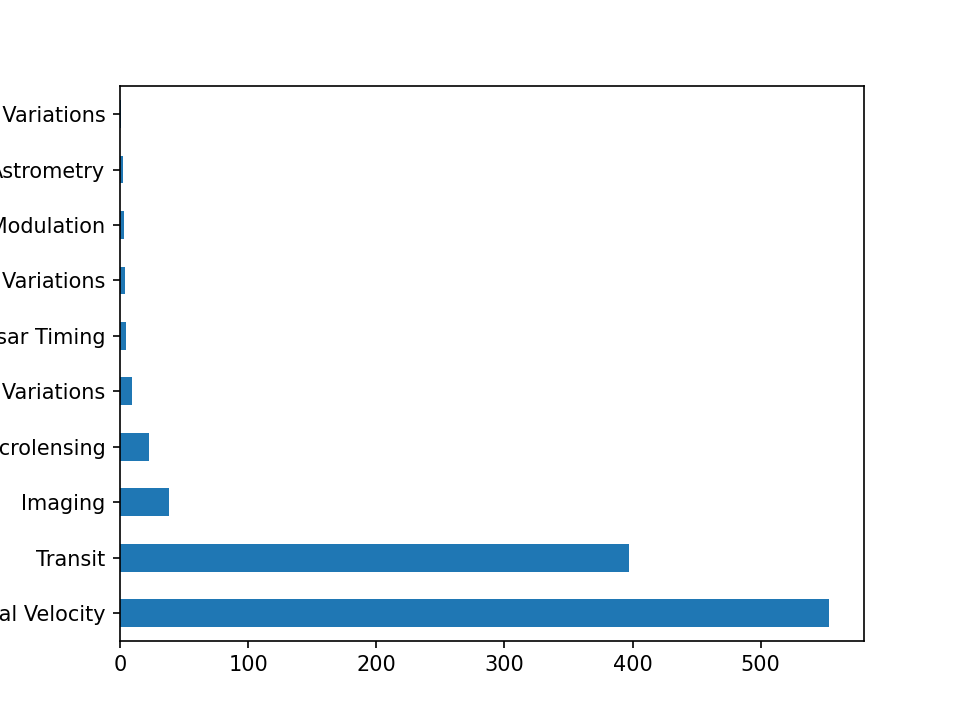

<AxesSubplot:>

In [11]:
kat_df["method"].value_counts()
kat_df["method"].value_counts().plot.barh()

## Surekli Degisken Özetleri 